In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
dr='../input/state-farm-distracted-driver-detection/imgs/train'
ct=[]
for cat in os.listdir(dr):
    ct.append(cat)

In [3]:
ct

['c7', 'c4', 'c1', 'c6', 'c2', 'c9', 'c8', 'c0', 'c3', 'c5']

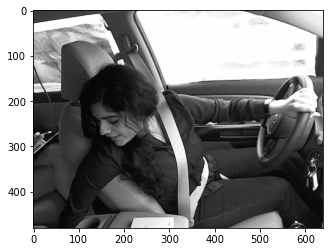

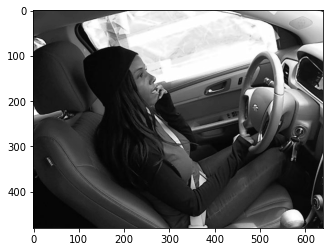

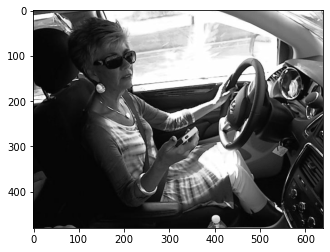

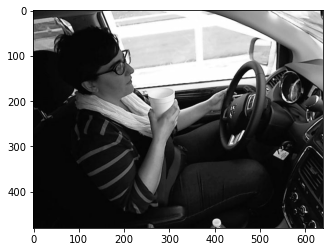

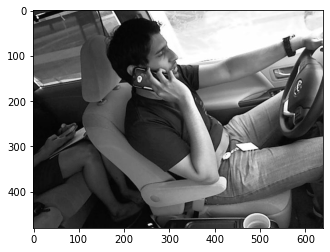

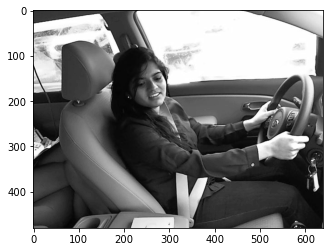

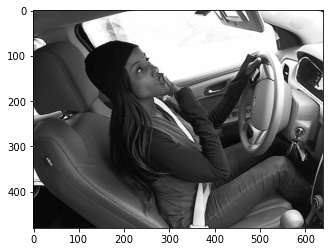

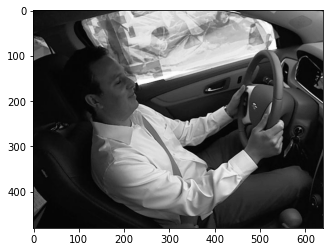

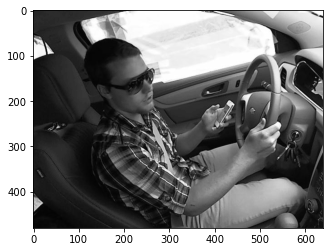

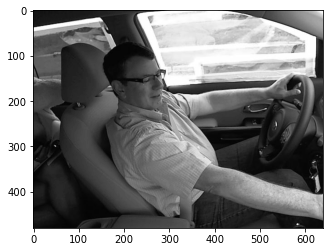

In [4]:
for cate in ct:
    path=os.path.join(dr,cate)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break

In [5]:
IMG_Size=150
train=[]
def train_data():
    for cate in ct:
        path=os.path.join(dr,cate)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            img=cv2.resize(img_array,(IMG_Size,IMG_Size))
            train.append([img,cate])

In [6]:
train_data()

In [8]:
X=[]
y=[]
for a,b in train:
    X.append(a)
    y.append(b)

In [9]:
y=pd.DataFrame(y)

In [10]:
y

,0
0,c7
1,c7
2,c7
3,c7
4,c7
...,...
22419,c5
22420,c5
22421,c5
22422,c5


In [11]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
Y=l1.fit_transform(y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [12]:
Y

array([7, 7, 7, ..., 5, 5, 5])

In [13]:
X=np.array(X).reshape(-1,IMG_Size,IMG_Size,1)

In [14]:
X=X/255

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D,Dropout,MaxPooling2D
from keras.layers import Flatten,Activation
from keras.layers import Dense

In [17]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(150, 150, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,Y_train,batch_size=16,epochs=5)

Epoch 1/5
1052/1052 [==============================] - 28s 26ms/step - loss: 2.2947 - accuracy: 0.1198
Epoch 2/5
1052/1052 [==============================] - 28s 26ms/step - loss: 1.2450 - accuracy: 0.5768
Epoch 3/5
1052/1052 [==============================] - 28s 26ms/step - loss: 0.4713 - accuracy: 0.8486
Epoch 4/5
1052/1052 [==============================] - 28s 27ms/step - loss: 0.2942 - accuracy: 0.9065
Epoch 5/5
1052/1052 [==============================] - 27s 26ms/step - loss: 0.2153 - accuracy: 0.9326


In [18]:
model.evaluate(X_test,Y_test)

176/176 [==============================] - 3s 17ms/step - loss: 0.1558 - accuracy: 0.9550


[0.15580405294895172, 0.955048143863678]